# Data exploration and pre-processing

In [127]:
import pandas as pd # install pandas
import matplotlib.pyplot as plt # pip install matplotlib 
from wordcloud import WordCloud, STOPWORDS # pip install wordcloud
import seaborn as sns # pip install seaborn
import numpy as np # pip install numpy

import re  # untuk regular expressions
from nltk.corpus import stopwords  # untuk stop-words # pip install nltk
from nltk.stem import WordNetLemmatizer  # untuk lemmatization
from nltk.corpus import stopwords  # untuk stop words

# Pastikan stopwords dan WordNetLemmatizer sudah diunduh sebelum digunakan
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split # pip install scikit-learn keras tensorflow
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

[nltk_data] Downloading package stopwords to C:\Users\Annisa
[nltk_data]     Fadila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Annisa
[nltk_data]     Fadila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
# Baca dataset dengan jalur
df_path = "../dataset/raw/news_dataset.csv"
df = pd.read_csv(df_path)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",NaN,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",NaN,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,NaN,2012-01-28


In [129]:
# jumlah kategori
print("Unique categories:",df['category'].nunique())
print("-------------------------------------------------")
# information about metadata
df.info()

Unique categories: 42
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209521 non-null  object
 2   category           209527 non-null  object
 3   short_description  189815 non-null  object
 4   authors            172109 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [130]:
# Tampilkan statistik deskriptif
df.describe()

,link,headline,category,short_description,authors,date
count,209527,209521,209527,189815,172109,209527
unique,209486,207995,42,187021,29168,3890
top,https://www.huffingtonpost.comhttps://www.publ...,Sunday Roundup,POLITICS,Welcome to the HuffPost Rise Morning Newsbrief...,Lee Moran,2012-02-21
freq,2,90,35602,192,2954,100


In [131]:
# drop columns yang tidak digunakan
new_df = df.drop(columns=['authors','link','date'])
new_df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [132]:
# Cek jumlah data duplikat sebelum penghapusan
initial_duplicates = new_df.duplicated().sum()
print(f'Jumlah data duplikat sebelum penghapusan: {initial_duplicates}')

# Menghapus data duplikat
new_df = new_df.drop_duplicates()

# Cek jumlah data duplikat setelah penghapusan
final_duplicates = new_df.duplicated().sum()
print(f'Jumlah data duplikat setelah penghapusan: {final_duplicates}')

Jumlah data duplikat sebelum penghapusan: 471
Jumlah data duplikat setelah penghapusan: 0


In [133]:
# Menampilkan jumlah baris untuk setiap kategori di kolom 'category'
category_counts = new_df['category'].value_counts()
print(category_counts)

category
POLITICS          35585
WELLNESS          17940
ENTERTAINMENT     17358
TRAVEL             9897
STYLE & BEAUTY     9681
PARENTING          8763
HEALTHY LIVING     6689
QUEER VOICES       6344
FOOD & DRINK       6340
BUSINESS           5990
COMEDY             5390
SPORTS             5077
BLACK VOICES       4580
HOME & LIVING      4288
PARENTS            3897
THE WORLDPOST      3664
WEDDINGS           3653
CRIME              3558
WOMEN              3487
IMPACT             3483
DIVORCE            3423
WORLD NEWS         3297
MEDIA              2942
WEIRD NEWS         2777
GREEN              2617
WORLDPOST          2579
RELIGION           2570
STYLE              2247
SCIENCE            2206
TASTE              2096
TECH               2055
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1338
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1073
EDUCATI

In [134]:
# Daftar kategori yang ingin dihapus
categories_to_remove = ['U.S. NEWS', 'BLACK VOICES', 'LATINO VOICES', 'WORLDPOST', 'WEIRD NEWS', 'QUEER VOICES', 'FIFTY']

# Menghapus baris dengan kategori yang ada di dalam categories_to_remove
new_df = new_df[~new_df['category'].isin(categories_to_remove)]

print("Unique categories:",new_df['category'].nunique())

Unique categories: 35


In [135]:
# Menghapus baris yang berisi null value
total_empty_rows = new_df.isnull().any(axis=1).sum()
print(f"Total baris dengan nilai kosong: {total_empty_rows}")

# Menghapus baris yang memiliki nilai kosong (NaN) di salah satu kolom
new_df = new_df.dropna()

# Menampilkan jumlah nilai kosong (NaN) setelah penghapusan
empty_rows_after = new_df.isnull().sum()
print("Jumlah nilai kosong per kolom setelah penghapusan:")
print(empty_rows_after)


Total baris dengan nilai kosong: 16206
Jumlah nilai kosong per kolom setelah penghapusan:
headline             0
category             0
short_description    0
dtype: int64


In [136]:
# create final dataframe of combined headline and short_description
final_df = new_df.copy()
final_df['length_of_news'] = final_df['headline'] + final_df['short_description']
final_df.drop(['headline','short_description'], inplace=True, axis=1)
final_df['len_news'] = final_df['length_of_news'].map(lambda x: len(x))
final_df.head()

,category,length_of_news,len_news
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...,133
3,PARENTING,The Funniest Tweets From Parents This Week (Se...,215
7,WORLD NEWS,Puerto Ricans Desperate For Water After Hurric...,181
8,CULTURE & ARTS,How A New Documentary Captures The Complexity ...,224
9,WORLD NEWS,Biden At UN To Call Russian War An Affront To ...,208


In [137]:
# maximum length of news in each category
lenmax_df = final_df.groupby('category')['len_news'].max().reset_index().sort_values(by='len_news',ascending=False)
lenmax_df.head()

,category,len_news
21,POLITICS,1486
3,COLLEGE,1229
14,HEALTHY LIVING,1073
32,WELLNESS,1036
30,TRAVEL,978


In [138]:
# minimum lenght of news in each category
lenmin_df = final_df.groupby('category')['len_news'].min().reset_index().sort_values(by='len_news',ascending=False)
lenmin_df.head()

,category,len_news
0,ARTS,89
7,DIVORCE,66
5,CRIME,60
10,ENVIRONMENT,60
8,EDUCATION,57


## Visualisasi

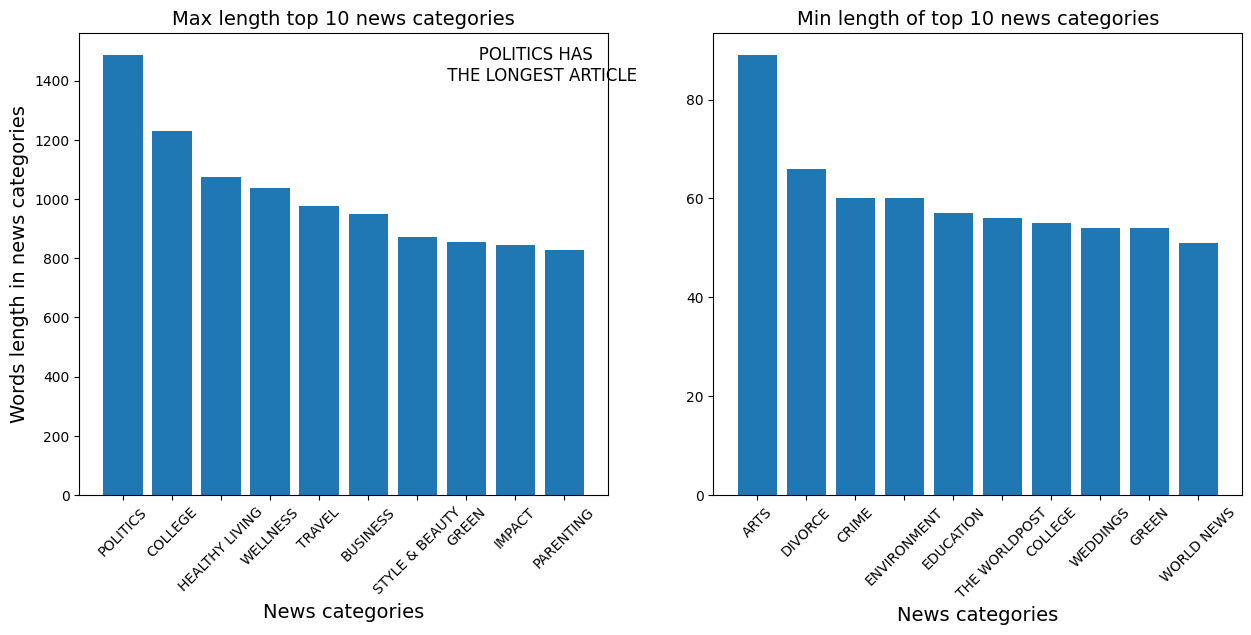

In [139]:
# plot the bar plots of max and min length of news articles
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.bar(lenmax_df['category'][:10],lenmax_df['len_news'][:10])
plt.xticks(rotation=45)
plt.ylabel("Words length in news categories", size=14)
plt.xlabel("News categories",  size=14)
plt.text(6.5,1400, '''       POLITICS HAS 
 THE LONGEST ARTICLE''', fontsize=12)
plt.title("Max length top 10 news categories", size=14)

plt.subplot(122)
plt.bar(lenmin_df['category'][:10], lenmin_df['len_news'][:10])
plt.xticks(rotation=45)
plt.xlabel("News categories", size=14)
plt.title("Min length of top 10 news categories", size=14)

plt.show()

(np.float64(-0.5), np.float64(1599.5), np.float64(599.5), np.float64(-0.5))

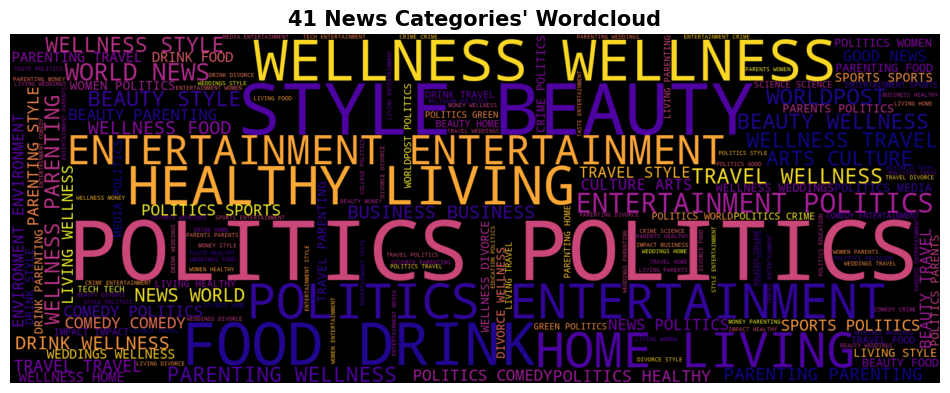

In [140]:
# wordcloud of categories of news articles in our dataset
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(final_df.category))

plt.title("41 News Categories' Wordcloud", size=15, weight='bold')
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

In [141]:
# # Menggabungkan headline dan short_description untuk setiap artikel
# new_df['full_text'] = new_df['headline'] + ' ' + new_df['short_description']

# # Ambil 10 kategori teratas
# categories = new_df['category'].value_counts().index[:10]

# # Membuat figure untuk visualisasi
# plt.figure(figsize=(15,15))

# # Loop untuk membuat wordcloud per kategori
# for idx, category in enumerate(categories):
#     # Ambil artikel-artikel yang sesuai dengan kategori
#     cat_df = new_df[new_df['category'] == category]
    
#     # Gabungkan semua teks artikel untuk kategori tersebut
#     text = ' '.join(cat_df['full_text'])
    
#     # Buat wordcloud untuk kategori tersebut
#     wc = WordCloud(max_words=1000,
#                    min_font_size=10,
#                    height=600,
#                    width=1600,
#                    background_color='white',
#                    contour_color='black',
#                    colormap='plasma',
#                    stopwords=STOPWORDS).generate(text)
    
#     # Plot wordcloud untuk kategori ini
#     plt.subplot(5, 2, idx + 1)  # Menyesuaikan grid untuk 10 kategori
#     plt.imshow(wc, interpolation='bilinear')
#     plt.title(f"Wordcloud for category: {category}")
#     plt.axis('off')

# # Menampilkan semua wordcloud
# plt.tight_layout()
# plt.show()


## Preprocessing lanjutan

In [142]:
# create new dataframe of category and length of each news articles in that categories
ndf = final_df.copy()
ndf.drop('len_news', inplace=True, axis=1)
ndf

,category,length_of_news
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
7,WORLD NEWS,Puerto Ricans Desperate For Water After Hurric...
8,CULTURE & ARTS,How A New Documentary Captures The Complexity ...
9,WORLD NEWS,Biden At UN To Call Russian War An Affront To ...
...,...,...
209522,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...
209524,SPORTS,"Giants Over Patriots, Jets Over Colts Among M..."
209525,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [143]:
# start with removing some data from politics dataframe ndf
politics_list = list(ndf[ndf['category'] == 'POLITICS'].index) 
list_16 = politics_list[:16000] # list of 16000 row labels of POLITICS category

# drop these 16000 labels from the dataset
ndf2 = ndf.copy()
ndf2.drop(list_16, axis=0, inplace=True)
ndf2

,category,length_of_news
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
7,WORLD NEWS,Puerto Ricans Desperate For Water After Hurric...
8,CULTURE & ARTS,How A New Documentary Captures The Complexity ...
9,WORLD NEWS,Biden At UN To Call Russian War An Affront To ...
...,...,...
209522,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...
209524,SPORTS,"Giants Over Patriots, Jets Over Colts Among M..."
209525,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [144]:
# clean the text data using regex and data cleaning function
def datacleaning(text):
    whitespace = re.compile(r"\s+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = whitespace.sub(' ', text)
    text = user.sub('', text)
    text = re.sub(r"\[[^()]*\]","", text)
    text = re.sub("\d+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    text = text.lower()
    
    # removing stop-words
    text = [word for word in text.split() if word not in list(STOPWORDS)]
    
    # word lemmatization
    sentence = []
    for word in text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word,'v'))
        
    return ' '.join(sentence)   

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Annisa Fadila\AppData\Local\Temp\ipykernel_21712\1226822745.py:8: SyntaxWarning: invalid escape sequence '\d'
  text = re.sub("\d+", "", text)


In [145]:
print(ndf2.columns)

Index(['category', 'length_of_news'], dtype='object')


In [146]:
print(ndf2.index)

Index([     2,      3,      7,      8,      9,     10,     11,     12,     13,
           15,
       ...
       209516, 209517, 209518, 209519, 209520, 209522, 209523, 209524, 209525,
       209526],
      dtype='int64', length=156662)


In [147]:
# Example of pre-processing using above function
print("Text sentence before pre-processing:\n",ndf2['length_of_news'][2])
print("---"*35)
print("Text sentence after pre-processing:\n",datacleaning(ndf2['length_of_news'][2]))

Text sentence before pre-processing:
 23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)"Until you have a dog you don't understand what could be eaten."
---------------------------------------------------------------------------------------------------------
Text sentence after pre-processing:
 funniest tweet cat dog week sept dog dont understand eat


In [148]:
# menerapkan fungsi datacleaning ke kolom 'length_of_news'
ndf2['length_of_news'] = ndf2['length_of_news'].apply(datacleaning)

In [149]:
# length of total characters before and after cleaning text data
old_length = ndf['length_of_news'].apply(len).sum()
new_length = ndf2['length_of_news'].apply(len).sum()
print(f"Old chracters length of text data: {old_length}")
print(f"New chracters length of text data: {new_length}")

Old chracters length of text data: 31815690
New chracters length of text data: 19982572


In [150]:
# length of total words before and after cleaning text data
old_text = ndf['length_of_news'].apply(lambda x: len([i for i in x.split()])).sum()
new_text = ndf2['length_of_news'].apply(lambda x: len([i for i in x.split()])).sum()
print(f"Old word length of text data: {old_text}")
print(f"New word length of text data: {new_text}")

Old word length of text data: 5226340
New word length of text data: 2845791


# Tokenization and vectorization

Istilah umum dalam Natural Language Processing (NLP):
1. Dokumen Setiap contoh pelatihan yang digunakan dalam dataset teks disebut sebagai Dokumen. Setiap entri atau teks yang dianalisis dalam dataset dianggap sebagai satu dokumen.
2. Korpus Kumpulan dari dokumen-dokumen disebut sebagai korpus teks. Korpus ini berfungsi sebagai sumber data untuk melatih model NLP. Sebagai contoh, korpus bisa berupa kumpulan artikel berita, buku, atau tweet.
3. Kosa Kata (BoW) Kosa kata atau Bag-of-Words (BoW) adalah representasi dari jumlah kata unik yang terdapat dalam korpus teks. Dalam BoW, urutan kata tidak diperhatikan, dan hanya kata-kata yang berbeda dalam teks yang dihitung. Misalnya, jika ada 100 kata berbeda dalam korpus, maka kosa kata tersebut terdiri dari 100 kata unik.
4. Stopwords Stopwords adalah kata-kata yang paling sering digunakan dalam bahasa, tetapi tidak memberikan makna yang signifikan dalam konteks teks, seperti kata sambung atau kata penghubung. Contoh stopwords adalah "yang", "di", "ke", "dan", "a", "the". Stopwords sering kali dihapus dalam tahap pra-pemrosesan untuk memperbaiki kualitas analisis teks.
5. N-Grams N-Grams adalah representasi teks dalam bentuk urutan kata yang terdiri dari N kata. Misalnya, dalam unigrams, N = 1 (satu kata), dalam bigrams N = 2 (dua kata berurutan), dan seterusnya. N-grams digunakan untuk menangkap konteks dalam kalimat atau paragraf dan meningkatkan pemahaman tentang teks.
6. Tokenisasi Tokenisasi adalah langkah awal dalam pemrosesan teks di NLP, di mana kalimat atau paragraf dibagi menjadi bagian-bagian yang lebih kecil, yaitu kata-kata atau token. Tokenisasi memungkinkan mesin untuk bekerja dengan kata-kata individual, yang memudahkan analisis lebih lanjut.
7. Vektorisasi Mesin tidak bisa memahami teks atau kata-kata dalam bentuk aslinya. Oleh karena itu, teks atau kata-kata harus diubah menjadi angka atau vektor yang dapat diproses lebih lanjut. Proses ini dikenal sebagai vektorisasi, di mana token-token yang sudah diproses diubah menjadi vektor numerik yang mewakili kata atau dokumen tersebut dalam ruang vektor untuk analisis lebih lanjut atau untuk membangun model.

In [151]:
# Mengambil sampel 5 dokumen pertama dari dataset
samples = list(ndf2['length_of_news'][:5].values)  # Sampel dari 5 dokumen pertama

token_index = {}  # Membuat indeks token dalam data
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1  # Memberikan indeks unik untuk setiap kata unik
            
max_length = 15  # Menentukan panjang maksimum setiap dokumen yang akan diproses

# Array untuk menyimpan hasil yang telah diproses
results = np.zeros(shape=(len(samples),   # Hasil akan disimpan dalam array ini
                          max_length, 
                          max(token_index.values()) + 1)) 

print("Dimensi array hasil yang disimpan:", results.shape)
print("Indeks token dari kata-kata unik: \n", token_index)

# Mengisi array 'results' dengan nilai 1 pada indeks yang sesuai untuk setiap kata dalam sampel
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:  # Memproses hingga max_length
        index = token_index.get(word)  # Mendapatkan indeks kata
        results[i, j, index] = 1  # Menandai keberadaan kata dalam array hasil

Dimensi array hasil yang disimpan: (5, 15, 84)
Indeks token dari kata-kata unik: 
 {'funniest': 1, 'tweet': 2, 'cat': 3, 'dog': 4, 'week': 5, 'sept': 6, 'dont': 7, 'understand': 8, 'eat': 9, 'parent': 10, 'accidentally': 11, 'put': 12, 'grownup': 13, 'toothpaste': 14, 'toddlers': 15, 'toothbrush': 16, 'scream': 17, 'clean': 18, 'teeth': 19, 'carolina': 20, 'reaper': 21, 'dip': 22, 'tabasco': 23, 'sauce': 24, 'puerto': 25, 'ricans': 26, 'desperate': 27, 'water': 28, 'hurricane': 29, 'fionas': 30, 'rampagemore': 31, 'half': 32, 'million': 33, 'people': 34, 'remain': 35, 'without': 36, 'service': 37, 'three': 38, 'days': 39, 'storm': 40, 'lash': 41, 'us': 42, 'territory': 43, 'new': 44, 'documentary': 45, 'capture': 46, 'complexity': 47, 'child': 48, 'immigrantsin': 49, 'mija': 50, 'director': 51, 'isabel': 52, 'castro': 53, 'combine': 54, 'music': 55, 'documentaries': 56, 'style': 57, 'euphoria': 58, 'clueless': 59, 'tell': 60, 'nuanced': 61, 'immigration': 62, 'story': 63, 'biden': 64, 

In [152]:
# Menyiapkan data input dan target
X = ndf2['length_of_news']  # Data teks (news articles)
encoder = LabelEncoder()  # Membuat LabelEncoder untuk label encoding kategori
y = encoder.fit_transform(ndf2['category'])  # Mengonversi kategori menjadi angka (integer encoding)

# Menampilkan shape dari input dan target
print("Shape of input data: ", X.shape)
print("Shape of target variable: ", y.shape)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Inisialisasi Tokenizer dari Keras untuk memproses teks
tokenizer = Tokenizer(num_words=100000, oov_token='<OOV>')  # Menentukan jumlah kata yang dipertimbangkan
tokenizer.fit_on_texts(X_train)  # Membangun indeks kata dari data latih

# Mengubah teks dalam X_train menjadi urutan angka
train_seq = tokenizer.texts_to_sequences(X_train)  
train_padseq = pad_sequences(train_seq, maxlen=20)  # Menambahkan padding agar panjang urutannya seragam

# Mengubah teks dalam X_test menjadi urutan angka dan melakukan padding
test_seq = tokenizer.texts_to_sequences(X_test)
test_padseq = pad_sequences(test_seq, maxlen=20)

# Menampilkan informasi tentang kamus kata dan panjang urutan
word_index = tokenizer.word_index
max_words = 150000  # Jumlah total kata yang dipertimbangkan dalam lapisan embedding
total_words = len(word_index)  # Total kata yang ada dalam kamus
maxlen = 20  # Panjang maksimum urutan kata
print("Length of word index:", total_words)

# Mengonversi label target menjadi one-hot encoding
y_train = to_categorical(y_train, num_classes=41)  # Menyusun kategori target menjadi vektor one-hot
y_test = to_categorical(y_test, num_classes=41)    # Menyusun kategori target menjadi vektor one-hot

# Menampilkan informasi shape setelah padding
print("Shape of train data:", train_padseq.shape)
print("Shape of test data:", test_padseq.shape)


Shape of input data:  (156662,)
Shape of target variable:  (156662,)
Length of word index: 166171
Shape of train data: (125329, 20)
Shape of test data: (31333, 20)


# Model training using embedding layer and RNN

### 4.1 Baseline model 1 with SimpleRNN and embedding layer

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Bidirectional, Dropout, Dense

# Pastikan `total_words` dan `maxlen` sudah didefinisikan sebelumnya
total_words = 10000  # Contoh jumlah kata dalam data
maxlen = 100  # Panjang input sequence

# Definisikan model
model = Sequential()
model.add(Embedding(total_words, 70, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(41, activation='softmax'))

# Bangun model secara manual
model.build(input_shape=(None, maxlen))

# Menampilkan summary
model.summary()

e:\Pembelajaran\Semester 5\PSO\FP\FinalProject_MLOps_Group1\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 100, 70)        │       700,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_34                │ (None, 100, 128)       │        17,280 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_35                │ (None, 100, 128)       │        24,704 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_53 (SimpleRNN)       │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 41)             │         1,353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 748,489 (2.86 MB)

 Trainable params: 748,489 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

### 4.2 Model RNN